In [271]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np
from skimage import util 
import os
import cv2

In [288]:
def render(img_rgb):
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (25,25), 0, 0)
    img_blend = cv2.divide(img_gray, img_blur, scale=256)
    img_blend = cv2.cvtColor(img_blend, cv2.COLOR_GRAY2BGR)
    return img_blend

In [317]:
from colorsys import hsv_to_rgb

def rainbow_color_stops(height, width, start=5/10, end=9/10, theta=np.pi/16):
    colors = []
    for i in range(height):
        color = []
        for j in range(width):
            
            i_slope = i*np.cos(theta) - j*np.sin(theta)
            h = start + (end-start)*i_slope/height
            
            j_slope = i*np.sin(theta) + j*np.cos(theta)
            s = start + (end-start)*j_slope/width
            color.append(hsv_to_rgb(h, s, 0.8))
        colors.append(color)
    colors = np.array(colors)    
    return colors

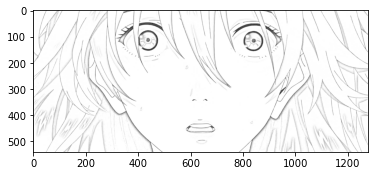

In [318]:
img_cv2 = cv2.imread("")
img_render = render(img_cv2)
plt.imshow(img_render)

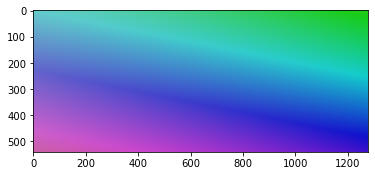

In [319]:
height, width, _ = img_cv2.shape
colors = rainbow_color_stops(height, width)
plt.imshow(colors)

In [320]:
img_render2 = img_render.copy()
img_render2 = img_render2/255.0
for i in range(height):
    for j in range(width):
        if img_render2[i,j,:].sum() < 2.5:
            img_render2[i,j] = colors[i,j]
        else:
            img_render2[i,j] = [1,1,1]

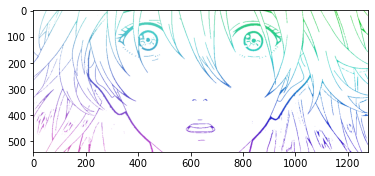

In [321]:
plt.imshow(img_render2)

In [322]:
plt.imsave("/Users/yimintang/Downloads/1.jpg", img_render2)